# APPLIED MACHINE LEARNING ASSIGNMENT 1

Lecturer's Name: Paul <br />
Student Name: Yap Li Xen (Kelvin) <br />
Student ID: P7414389 <br />
Class: DSAI/2021

# PART A: CLASSIFICATION

Contents
========
<ol>
    <li>Background</li>
    <li>Exploratory Data Analysis</li>
    <li>Data Preparation</li>
    <ol>
        <li>Data Cleaning</li>
        <li>Data Transformation</li>
    </ol>
    <li>Train Model (Single Model)</li>
    <ol>
        <li>Select Model</li>
        <li>Train Test Split</li>
        <li>Train Model</li>
        <li>Score Model</li>
    </ol>
    <li>Evaluate Model (Single Model)</li>
    <ol>
        <li>confusion_matrix</li>
        <li>plot_confusion_matrix</li>
        <li>classification_report</li>
    </ol>
    <li>Model Improvement (Single Model)</li>
    <ol>
        <li>Hyperparameter Tuning</li>
        <li>Bias-variance trade-off</li>
    </ol>
    <li>Train Model (Multiple Models)</li>
    <li>Kaggle Competition</li>
</ol>

Background
==========
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.


One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.


Complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

Exploratory Data Analysis
======================
A first view of the dataset to understand the data structure and data value.

In [41]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/train.csv', sep=',')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


![](data/data_description.png)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.pairplot(df, hue="Survived", height=2)
plt.show()

In [45]:
corr = df.corr()
sns.heatmap(corr, cmap="YlGnBu",annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values) 
plt.show()

Data Preparation
==============
* Data Cleaning
* Data Transformation

### 1. Feature Selection
To remove features that doesn't bring impact or less important to the classification

In [46]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], 1)
df.shape

(891, 8)

### 2. SibSp & Parch
To normalise the number of sibling/spouse/parents/children aboard the Titanic into single column **hasFamily** with the value 1 (yes) or 0 (no)

In [47]:
df['hasFamily'] = np.where((df['SibSp'] <= 0) & (df['Parch'] <= 0), 0, 1)
df = df.drop(['SibSp', 'Parch'], 1)
print(df.head())
df.shape

   Survived  Pclass     Sex   Age     Fare Embarked  hasFamily
0         0       3    male  22.0   7.2500        S          1
1         1       1  female  38.0  71.2833        C          1
2         1       3  female  26.0   7.9250        S          0
3         1       1  female  35.0  53.1000        S          1
4         0       3    male  35.0   8.0500        S          0


(891, 7)

### 3. Fare
To group Fare into multiple folds

In [48]:
fare_bins=[0,10,20,40,60,80,100,200,600]
fare_labels=[1,2,3,4,5,6,7,8]
df['Fare_Group'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels, right=False)
df = df.drop('Fare', 1)
print(df.head())
df.shape

   Survived  Pclass     Sex   Age Embarked  hasFamily Fare_Group
0         0       3    male  22.0        S          1          1
1         1       1  female  38.0        C          1          5
2         1       3  female  26.0        S          0          1
3         1       1  female  35.0        S          1          4
4         0       3    male  35.0        S          0          1


(891, 7)

### 4. Age
To normalise Age into 4 categories
* Children (0-12)
* Adult (13-59)
* Elderly (60 and above)
* Unknown (No Age Info)

In [49]:
df['Age'] = df['Age'].fillna(-1)
age_bins=[-1,0,13,60,120]
age_labels=['Unknown','Children','Adult','Elderly']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
df = df.drop('Age', 1)
print(df.head())
df.shape

   Survived  Pclass     Sex Embarked  hasFamily Fare_Group Age_Group
0         0       3    male        S          1          1     Adult
1         1       1  female        C          1          5     Adult
2         1       3  female        S          0          1     Adult
3         1       1  female        S          1          4     Adult
4         0       3    male        S          0          1     Adult


(891, 7)

### 5. Encoding
* column Sex
* column Embarked

In [50]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
df = df[df['Embarked'].notna()]
df['Embarked'] = ohe.fit_transform(df["Embarked"].values.reshape(-1,1)).toarray()
df['Sex'] = ohe.fit_transform(df["Sex"].values.reshape(-1,1)).toarray()

print(df.head())
print(df.shape)

   Survived  Pclass  Sex  Embarked  hasFamily Fare_Group Age_Group
0         0       3  0.0       0.0          1          1     Adult
1         1       1  1.0       1.0          1          5     Adult
2         1       3  1.0       0.0          0          1     Adult
3         1       1  1.0       0.0          1          4     Adult
4         0       3  0.0       0.0          0          1     Adult
(889, 7)


In [51]:
df = pd.get_dummies(df)
print(df.head())
df.shape

   Survived  Pclass  Sex  Embarked  hasFamily  Fare_Group_1  Fare_Group_2  \
0         0       3  0.0       0.0          1             1             0   
1         1       1  1.0       1.0          1             0             0   
2         1       3  1.0       0.0          0             1             0   
3         1       1  1.0       0.0          1             0             0   
4         0       3  0.0       0.0          0             1             0   

   Fare_Group_3  Fare_Group_4  Fare_Group_5  Fare_Group_6  Fare_Group_7  \
0             0             0             0             0             0   
1             0             0             1             0             0   
2             0             0             0             0             0   
3             0             1             0             0             0   
4             0             0             0             0             0   

   Fare_Group_8  Age_Group_Unknown  Age_Group_Children  Age_Group_Adult  \
0          

(889, 17)

Train Model (Single Model)
======================

### Select Model
Linear SVC is selected as training model following the cheatsheet in our use case

![](data/sklearn_cheatsheet.png)

### Train Test Split
Split training and test data into (80/20) and fix random state to 42

In [54]:
from sklearn.model_selection import train_test_split

df.info()
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            889 non-null    int64  
 1   Pclass              889 non-null    int64  
 2   Sex                 889 non-null    float64
 3   Embarked            889 non-null    float64
 4   hasFamily           889 non-null    int32  
 5   Fare_Group_1        889 non-null    uint8  
 6   Fare_Group_2        889 non-null    uint8  
 7   Fare_Group_3        889 non-null    uint8  
 8   Fare_Group_4        889 non-null    uint8  
 9   Fare_Group_5        889 non-null    uint8  
 10  Fare_Group_6        889 non-null    uint8  
 11  Fare_Group_7        889 non-null    uint8  
 12  Fare_Group_8        889 non-null    uint8  
 13  Age_Group_Unknown   889 non-null    uint8  
 14  Age_Group_Children  889 non-null    uint8  
 15  Age_Group_Adult     889 non-null    uint8  
 16  Age_Grou

### Train Model (LinearSVC)

In [55]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train, y_train)

LinearSVC()

### Score Model

In [56]:
training_data_score = model.score(X_train, y_train)
print("Training Data Score: {:.2f}%".format(training_data_score*100))

test_data_score = model.score(X_test, y_test)
print("Test Data Score: {:.2f}%".format(test_data_score*100))

Training Data Score: 80.17%
Test Data Score: 76.97%


Evaluate Model
=============

### 1. confusion_matrix

In [57]:
from sklearn.metrics import confusion_matrix

y_predict = model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[84 25]
 [16 53]]


### 2. plot_confusion_matrix

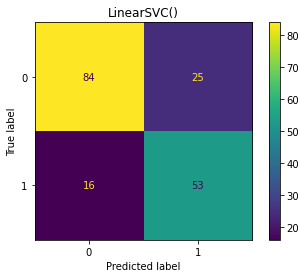

In [58]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test)
plt.title(model)
plt.show()

### 3. classification_report

In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       109
           1       0.68      0.77      0.72        69

    accuracy                           0.77       178
   macro avg       0.76      0.77      0.76       178
weighted avg       0.78      0.77      0.77       178



Model Improvement (Single Model)
=============================
* Hyperparameter Tuning
* Bias-variance trade-off

### 1. Hyperparameter Tuning
To use GridSearchCV which includes Cross Validation to identify best paramter and best score.

In [60]:
from sklearn.model_selection import GridSearchCV

svm = LinearSVC()
param_grid = {'C': [0.01,0.1,1.0,10.0,100.0]}
grid_search = GridSearchCV(svm, param_grid=param_grid, cv=5, verbose=3, return_train_score=True)
grid_search.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.01 ..........................................................
[CV] .......... C=0.01, score=(train=0.790, test=0.762), total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .......... C=0.01, score=(train=0.775, test=0.824), total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .......... C=0.01, score=(train=0.779, test=0.810), total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .......... C=0.01, score=(train=0.782, test=0.746), total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .......... C=0.01, score=(train=0.789, test=0.725), total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ........... C=0.1, score=(train=0.812, test=0.790), total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ........... 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] .......... C=10.0, score=(train=0.801, test=0.776), total=   0.0s
[CV] C=10.0 ..........................................................
[CV] .......... C=10.0, score=(train=0.794, test=0.831), total=   0.0s
[CV] C=10.0 ..........................................................
[CV] .......... C=10.0, score=(train=0.784, test=0.803), total=   0.0s
[CV] C=10.0 ..........................................................
[CV] .......... C=10.0, score=(train=0.810, test=0.789), total=   0.0s
[CV] C=10.0 ..........................................................
[CV] .......... C=10.0, score=(train=0.801, test=0.761), total=   0.0s
[CV] C=100.0 .........................................................
[CV] ......... C=100.0, score=(train=0.724, test=0.706), total=   0.0s
[CV] C=100.0 .........................................................
[CV] ......... C=100.0, score=(train=0.786, test=0.803), total=   0.0s
[CV] C=100.0 .........................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

[CV] ......... C=100.0, score=(train=0.399, test=0.401), total=   0.0s
[CV] C=100.0 .........................................................
[CV] ......... C=100.0, score=(train=0.789, test=0.739), total=   0.0s
[CV] C=100.0 .........................................................
[CV] ......... C=100.0, score=(train=0.772, test=0.746), total=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.3s finished


In [61]:
print("Best Param: {}".format(grid_search.best_params_))
print("Best Score: {:.2f}%".format(grid_search.best_score_*100))

Best Param: {'C': 1.0}
Best Score: 79.47%


### 2. Bias-variance trade-off
To identify Appropriate-fitting

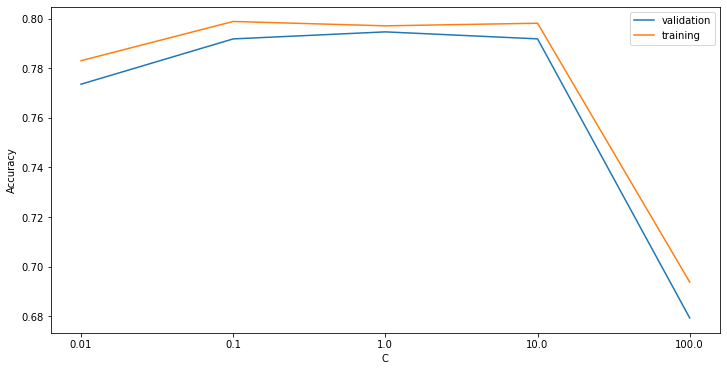

In [62]:
plt.figure(figsize=(12, 6))
validation_score = grid_search.cv_results_["mean_test_score"]
train_score = grid_search.cv_results_["mean_train_score"]
plt.plot(validation_score, label="validation")
plt.plot(train_score, label="training")
plt.xticks(np.arange(5), param_grid['C']); plt.xlabel("C"); plt.ylabel("Accuracy");plt.legend(loc='best');

Train Model (Multiple Models)
=========================
To train multiple models and compare the scores

### Assign multiple models & their corresponding param_grid into Dictionary Array

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

Dict = [
    {'model': LogisticRegression(),
     'param_grid': {'C': [0.01,0.1,1.0,10.0,100.0], 'penalty': ['l1', 'l2', 'elasticnet', 'none']}},
    {'model': KNeighborsClassifier(),
     'param_grid': {'n_neighbors': [1,2,3,4,5,6,7,8,9]}},
    {'model': GaussianNB(),
     'param_grid': {'var_smoothing': np.logspace(0,-9, num=100)}},
    {'model': DecisionTreeClassifier(),
     'param_grid': {'criterion': ['gini', 'entropy']}},
    {'model': SVC(),
     'param_grid': {'C': [0.01,0.1,1.0,10.0,100.0]}},
    {'model': LinearSVC(),
     'param_grid': {'C': [0.01,0.1,1.0,10.0,100.0], 'penalty': ['l1', 'l2']}}
]

### Loop Dictionary and compile all scores into table

In [64]:
rows = []
for i in Dict:
    # Fit Training Data to model selected
    model = i['model']
    model.fit(X_train, y_train)
    
    # Predict Train Data
    y_predict_train_data = model.predict(X_train)
    x_train_accuracy_score = accuracy_score(y_train, y_predict_train_data)
    x_train_auc_score = roc_auc_score(y_train, y_predict_train_data)

    # Predict Test Data
    y_predict_test_data = model.predict(X_test)
    x_test_accuracy_score = accuracy_score(y_test, y_predict_test_data)
    x_test_auc_score = roc_auc_score(y_test, y_predict_test_data)

    # Calculate Confusion_Matrix
    cm = confusion_matrix(y_test, y_predict_test_data)

    # Perform Hyperparameter Tuning & Cross Validation
    grid_search = GridSearchCV(model, param_grid=i['param_grid'], cv=5, verbose=3, return_train_score=True)
    grid_search.fit(X_train, y_train)

    rows.append([model, 
                 "{:.2f}%".format(x_train_accuracy_score*100), 
                 "{:.2f}%".format(x_test_accuracy_score*100), 
                 "{:.2f}".format(x_train_auc_score), 
                 "{:.2f}".format(x_test_auc_score), 
                 cm,
                 grid_search.best_params_,
                 "{:.2f}%".format(grid_search.best_score_*100)])

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.01, penalty=l1 ..............................................
[CV] .. C=0.01, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] .. C=0.01, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] .. C=0.01, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] .. C=0.01, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] .. C=0.01, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=0.01, penalty=l2 ..............................................
[CV]  C=0.01, penalty=l2, score=(train=0.769, test=0.727), total=   0.0s
[CV] C=0.01, penalty=l2 ..............................................
[CV]  C=0.01,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this 

[CV] ... C=0.1, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ... C=0.1, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ... C=0.1, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ... C=0.1, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ... C=0.1, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=0.1, penalty=l2 ...............................................
[CV]  C=0.1, penalty=l2, score=(train=0.798, test=0.762), total=   0.0s
[CV] C=0.1, penalty=l2 ...............................................
[CV]  C=0.1, penalty=l2, score=(train=0.780, test=0.824), total=   0.0s
[CV] C=0.1, penalty=l2 ...............................................
[CV]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_mod

[CV] ... C=1.0, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ... C=1.0, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ... C=1.0, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ... C=1.0, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ... C=1.0, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1.0, penalty=l2 ...............................................
[CV]  C=1.0, penalty=l2, score=(train=0.803, test=0.762), total=   0.0s
[CV] C=1.0, penalty=l2 ...............................................
[CV]  C=1.0, penalty=l2, score=(train=0.791, test=0.831), total=   0.0s
[CV] C=1.0, penalty=l2 ...............................................
[CV]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_sele


[CV] C=1.0, penalty=none .............................................
[CV]  C=1.0, penalty=none, score=(train=0.801, test=0.789), total=   0.0s
[CV] C=1.0, penalty=none .............................................
[CV]  C=1.0, penalty=none, score=(train=0.794, test=0.768), total=   0.0s
[CV] C=10.0, penalty=l1 ..............................................
[CV] .. C=10.0, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10.0, penalty=l1 ..............................................
[CV] .. C=10.0, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10.0, penalty=l1 ..............................................
[CV] .. C=10.0, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10.0, penalty=l1 ..............................................
[CV] .. C=10.0, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10.0, penalty=l1 ..............................................
[CV] .. C=10.0, penalty=l1, score=(train=nan, test=nan), total=   0.0s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_mod

[CV]  C=100.0, penalty=l2, score=(train=0.801, test=0.789), total=   0.0s
[CV] C=100.0, penalty=l2 .............................................
[CV]  C=100.0, penalty=l2, score=(train=0.794, test=0.768), total=   0.0s
[CV] C=100.0, penalty=elasticnet .....................................
[CV]  C=100.0, penalty=elasticnet, score=(train=nan, test=nan), total=   0.0s
[CV] C=100.0, penalty=elasticnet .....................................
[CV]  C=100.0, penalty=elasticnet, score=(train=nan, test=nan), total=   0.0s
[CV] C=100.0, penalty=elasticnet .....................................
[CV]  C=100.0, penalty=elasticnet, score=(train=nan, test=nan), total=   0.0s
[CV] C=100.0, penalty=elasticnet .....................................
[CV]  C=100.0, penalty=elasticnet, score=(train=nan, test=nan), total=   0.0s
[CV] C=100.0, penalty=elasticnet .....................................
[CV]  C=100.0, penalty=elasticnet, score=(train=nan, test=nan), total=   0.0s
[CV] C=100.0, penalty=none .........

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_mod

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] n_neighbors=1 ...................................................
[CV] ... n_neighbors=1, score=(train=0.857, test=0.797), total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ... n_neighbors=1, score=(train=0.814, test=0.775), total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ... n_neighbors=1, score=(train=0.828, test=0.831), total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ... n_neighbors=1, score=(train=0.845, test=0.775), total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] n_neighbors=1 ...................................................
[CV] ... n_neighbors=1, score=(train=0.715, test=0.669), total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ... n_neighbors=2, score=(train=0.859, test=0.790), total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ... n_neighbors=2, score=(train=0.828, test=0.789), total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ... n_neighbors=2, score=(train=0.822, test=0.810), total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ... n_neighbors=2, score=(train=0.814, test=0.739), total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ... n_neighbors=2, score=(train=0.815, test=0.746), total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ... n_neighbors=3, score=(train=0.854, test=0.790), total=   0.0s
[CV] n

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  var_smoothing=0.43287612810830584, score=(train=0.782, test=0.782), total=   0.0s
[CV] var_smoothing=0.43287612810830584 ...............................
[CV]  var_smoothing=0.43287612810830584, score=(train=0.756, test=0.810), total=   0.0s
[CV] var_smoothing=0.43287612810830584 ...............................
[CV]  var_smoothing=0.43287612810830584, score=(train=0.763, test=0.768), total=   0.0s
[CV] var_smoothing=0.43287612810830584 ...............................
[CV]  var_smoothing=0.43287612810830584, score=(train=0.754, test=0.718), total=   0.0s
[CV] var_smoothing=0.3511191734215131 ................................
[CV]  var_smoothing=0.3511191734215131, score=(train=0.773, test=0.748), total=   0.0s
[CV] var_smoothing=0.3511191734215131 ................................
[CV]  var_smoothing=0.3511191734215131, score=(train=0.777, test=0.775), total=   0.0s
[CV] var_smoothing=0.3511191734215131 ................................
[CV]  var_smoothing=0.3511191734215131, score=(t

[CV] var_smoothing=0.02848035868435802 ...............................
[CV]  var_smoothing=0.02848035868435802, score=(train=0.759, test=0.725), total=   0.0s
[CV] var_smoothing=0.02310129700083159 ...............................
[CV]  var_smoothing=0.02310129700083159, score=(train=0.769, test=0.727), total=   0.0s
[CV] var_smoothing=0.02310129700083159 ...............................
[CV]  var_smoothing=0.02310129700083159, score=(train=0.745, test=0.746), total=   0.0s
[CV] var_smoothing=0.02310129700083159 ...............................
[CV]  var_smoothing=0.02310129700083159, score=(train=0.742, test=0.803), total=   0.0s
[CV] var_smoothing=0.02310129700083159 ...............................
[CV]  var_smoothing=0.02310129700083159, score=(train=0.745, test=0.754), total=   0.0s
[CV] var_smoothing=0.02310129700083159 ...............................
[CV]  var_smoothing=0.02310129700083159, score=(train=0.757, test=0.725), total=   0.0s
[CV] var_smoothing=0.01873817422860384 .......

[CV]  var_smoothing=0.001873817422860383, score=(train=0.738, test=0.739), total=   0.0s
[CV] var_smoothing=0.0015199110829529332 .............................
[CV]  var_smoothing=0.0015199110829529332, score=(train=0.736, test=0.692), total=   0.0s
[CV] var_smoothing=0.0015199110829529332 .............................
[CV]  var_smoothing=0.0015199110829529332, score=(train=0.731, test=0.739), total=   0.0s
[CV] var_smoothing=0.0015199110829529332 .............................
[CV]  var_smoothing=0.0015199110829529332, score=(train=0.736, test=0.768), total=   0.0s
[CV] var_smoothing=0.0015199110829529332 .............................
[CV]  var_smoothing=0.0015199110829529332, score=(train=0.733, test=0.711), total=   0.0s
[CV] var_smoothing=0.0015199110829529332 .............................
[CV]  var_smoothing=0.0015199110829529332, score=(train=0.738, test=0.739), total=   0.0s
[CV] var_smoothing=0.0012328467394420659 .............................
[CV]  var_smoothing=0.0012328467394

[CV]  var_smoothing=0.0001, score=(train=0.713, test=0.671), total=   0.0s
[CV] var_smoothing=0.0001 ............................................
[CV]  var_smoothing=0.0001, score=(train=0.731, test=0.739), total=   0.0s
[CV] var_smoothing=0.0001 ............................................
[CV]  var_smoothing=0.0001, score=(train=0.735, test=0.789), total=   0.0s
[CV] var_smoothing=0.0001 ............................................
[CV]  var_smoothing=0.0001, score=(train=0.733, test=0.711), total=   0.0s
[CV] var_smoothing=0.0001 ............................................
[CV]  var_smoothing=0.0001, score=(train=0.742, test=0.739), total=   0.0s
[CV] var_smoothing=8.111308307896872e-05 .............................
[CV]  var_smoothing=8.111308307896872e-05, score=(train=0.713, test=0.671), total=   0.0s
[CV] var_smoothing=8.111308307896872e-05 .............................
[CV]  var_smoothing=8.111308307896872e-05, score=(train=0.731, test=0.739), total=   0.0s
[CV] var_smoothing=

[CV]  var_smoothing=6.579332246575683e-06, score=(train=0.742, test=0.739), total=   0.0s
[CV] var_smoothing=5.336699231206313e-06 .............................
[CV]  var_smoothing=5.336699231206313e-06, score=(train=0.713, test=0.671), total=   0.0s
[CV] var_smoothing=5.336699231206313e-06 .............................
[CV]  var_smoothing=5.336699231206313e-06, score=(train=0.731, test=0.739), total=   0.0s
[CV] var_smoothing=5.336699231206313e-06 .............................
[CV]  var_smoothing=5.336699231206313e-06, score=(train=0.735, test=0.789), total=   0.0s
[CV] var_smoothing=5.336699231206313e-06 .............................
[CV]  var_smoothing=5.336699231206313e-06, score=(train=0.733, test=0.711), total=   0.0s
[CV] var_smoothing=5.336699231206313e-06 .............................
[CV]  var_smoothing=5.336699231206313e-06, score=(train=0.742, test=0.739), total=   0.0s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV]  var_smoothing=4.328761281083

[CV]  var_smoothing=3.5111917342151277e-07, score=(train=0.733, test=0.711), total=   0.0s
[CV] var_smoothing=3.5111917342151277e-07 ............................
[CV]  var_smoothing=3.5111917342151277e-07, score=(train=0.742, test=0.739), total=   0.0s
[CV] var_smoothing=2.848035868435799e-07 .............................
[CV]  var_smoothing=2.848035868435799e-07, score=(train=0.713, test=0.671), total=   0.0s
[CV] var_smoothing=2.848035868435799e-07 .............................
[CV]  var_smoothing=2.848035868435799e-07, score=(train=0.731, test=0.739), total=   0.0s
[CV] var_smoothing=2.848035868435799e-07 .............................
[CV]  var_smoothing=2.848035868435799e-07, score=(train=0.735, test=0.789), total=   0.0s
[CV] var_smoothing=2.848035868435799e-07 .............................
[CV]  var_smoothing=2.848035868435799e-07, score=(train=0.733, test=0.711), total=   0.0s
[CV] var_smoothing=2.848035868435799e-07 .............................
[CV]  var_smoothing=2.8480358684

[CV]  var_smoothing=1.873817422860383e-08, score=(train=0.735, test=0.789), total=   0.0s
[CV] var_smoothing=1.873817422860383e-08 .............................
[CV]  var_smoothing=1.873817422860383e-08, score=(train=0.733, test=0.711), total=   0.0s
[CV] var_smoothing=1.873817422860383e-08 .............................
[CV]  var_smoothing=1.873817422860383e-08, score=(train=0.742, test=0.739), total=   0.0s
[CV] var_smoothing=1.519911082952933e-08 .............................
[CV]  var_smoothing=1.519911082952933e-08, score=(train=0.713, test=0.671), total=   0.0s
[CV] var_smoothing=1.519911082952933e-08 .............................
[CV]  var_smoothing=1.519911082952933e-08, score=(train=0.731, test=0.739), total=   0.0s
[CV] var_smoothing=1.519911082952933e-08 .............................
[CV]  var_smoothing=1.519911082952933e-08, score=(train=0.735, test=0.789), total=   0.0s
[CV] var_smoothing=1.519911082952933e-08 .............................
[CV]  var_smoothing=1.519911082952

[CV]  var_smoothing=1e-09, score=(train=0.713, test=0.671), total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV]  var_smoothing=1e-09, score=(train=0.731, test=0.739), total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV]  var_smoothing=1e-09, score=(train=0.735, test=0.789), total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV]  var_smoothing=1e-09, score=(train=0.733, test=0.711), total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV]  var_smoothing=1e-09, score=(train=0.742, test=0.739), total=   0.0s
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] criterion=gini ..................................................
[CV] .. criterion=gini, score=(train=0.873, test=0.811), total=   0.0s
[CV] criterion=gini ..................................................
[CV] .. criterion=gini, score=(train=0.866, test=0.845), total=   0.0s
[C

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.01 ..........................................................
[CV] .......... C=0.01, score=(train=0.619, test=0.620), total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .......... C=0.01, score=(train=0.619, test=0.620), total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .......... C=0.01, score=(train=0.619, test=0.620), total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .......... C=0.01, score=(train=0.619, test=0.620), total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ........... C=0.1, score=(train=0.790, test=0.776), total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ........... C=0.1, score=(train=0.794, test=0.775), total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ........... C=0.1, score=(train=0.796, test=0.789), total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 821, in _

[CV] C=0.01, penalty=l1 ..............................................
[CV] .. C=0.01, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] .. C=0.01, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] .. C=0.01, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] .. C=0.01, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] .. C=0.01, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=0.01, penalty=l2 ..............................................
[CV]  C=0.01, penalty=l2, score=(train=0.790, test=0.762), total=   0.0s
[CV] C=0.01, penalty=l2 ..............................................
[CV]  C=0.01, penalty=l2, score=(train=0.775, test=0.824), total=   0.0s
[C

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 821, in _get_liblinear_solver_type
    raise ValueError('Unsupported set of arguments: %s, '
ValueError: Unsupported set of arguments: The combination of penalt

[CV] . C=100.0, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=100.0, penalty=l1 .............................................
[CV] . C=100.0, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=100.0, penalty=l1 .............................................
[CV] . C=100.0, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=100.0, penalty=l1 .............................................
[CV] . C=100.0, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=100.0, penalty=l1 .............................................
[CV] . C=100.0, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=100.0, penalty=l2 .............................................
[CV]  C=100.0, penalty=l2, score=(train=0.789, test=0.769), total=   0.0s
[CV] C=100.0, penalty=l2 .............................................
[CV]  C=100.0, penalty=l2, score=(train=0.434, test=0.408), total=   0.0s
[CV] C=100.0, penalty=l2 .............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished


### Display Summary Table Result

In [65]:
summary_table = pd.DataFrame(rows, columns=["Algorithm", 
                                            "accuracy_score(train)", 
                                            "accuracy_score(test)", 
                                            "roc_auc_score(train)", 
                                            "roc_auc_score(test)", 
                                            "Confusion Matrix",
                                            "Best Param",
                                            "Best Score"])
print(summary_table)

                  Algorithm accuracy_score(train) accuracy_score(test)  \
0      LogisticRegression()                79.89%               75.84%   
1    KNeighborsClassifier()                83.12%               79.78%   
2              GaussianNB()                73.42%               73.60%   
3  DecisionTreeClassifier()                86.64%               79.78%   
4                     SVC()                82.56%               82.58%   
5               LinearSVC()                80.17%               76.97%   

  roc_auc_score(train) roc_auc_score(test)      Confusion Matrix  \
0                 0.78                0.76  [[82, 27], [16, 53]]   
1                 0.81                0.78  [[92, 17], [19, 50]]   
2                 0.70                0.71  [[91, 18], [29, 40]]   
3                 0.85                0.79  [[90, 19], [17, 52]]   
4                 0.80                0.82  [[92, 17], [14, 55]]   
5                 0.78                0.77  [[84, 25], [16, 53]]   

    

Kaggle Competition
=================

In [ ]:
from sklearn.model_selection import train_test_split



df.info()
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)

In [ ]:
training_data_score = model.score(X_train, y_train)
print("Training Data Score: {:.2f}%".format(training_data_score*100))

test_data_score = model.score(X_test, y_test)
print("Test Data Score: {:.2f}%".format(test_data_score*100))

# References / Appendixes

1. https://www.kaggle.com/c/titanic/data
2. https://scikit-learn.org/stable/